# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***, so it will be challenging. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [7]:
pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=59631450d75c73085352955cbbca0903a4e194bd7a784345f8a612ed91c6e2fd
  Stored in directory: c:\users\vidus\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

## 1b. Load data 

In [3]:
# Read in the data to a variable called coffeeData
#coffeeData = pd.read_csv("OneDrive/Documents/SpringBoard/CaseStudies/Decision_Tree_Specialty_Coffee_Case_Study/data/RRDinerCoffeeData.csv")
coffeeData = pd.read_csv("C:/Users/vidus/OneDrive/Documents/SpringBoard/CaseStudies/Decision_Tree_Specialty_Coffee_Case_Study/data/RRDinerCoffeeData.csv")


## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [5]:
# Call head() on your data 
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [7]:
# Call .shape on your data
coffeeData.shape


(702, 9)

In [9]:
# Call info() on your data
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [11]:
# Call describe() on your data to get the relevant summary statistics for your data 
coffeeData.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [13]:
# Check out the names of our data's columns 
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [15]:
# Make the relevant name changes to spent_week and spent_per_week.

coffeeData.rename(columns={
    'spent_week': 'spent_last_week',
    'spent_month': 'spent_last_month',
    'SlrAY': 'salary'
}, inplace=True)


In [17]:
# Check out the column names
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [19]:
# Let's have a closer look at the gender column. Its values need cleaning.
coffeeData['Gender'].value_counts(dropna=False)

Gender
Male      355
Female    340
female      1
F           1
f           1
FEMALE      1
MALE        1
male        1
M           1
Name: count, dtype: int64

In [21]:
# See the gender column's unique values 
coffeeData['Gender'].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [23]:
# Replace all alternate values for the Female entry with 'Female'
coffeeData['Gender'] = coffeeData['Gender'].replace(
    ['female', 'F', 'f ', 'FEMALE'],
    'Female'
)


In [25]:
# Check out the unique values for the 'gender' column
coffeeData['Gender'].unique()

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [27]:
# Replace all alternate values with "Male"

coffeeData['Gender'] = coffeeData['Gender'].replace(
    ['male', 'MALE', 'M'],
    'Male'
)


In [29]:
# Let's check the unique values of the column "gender"
coffeeData['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
# Check out the unique values of the column 'Decision'
coffeeData['Decision'].unique() 

array([ 1., nan,  0.])

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [33]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
coffeeData['Decision'] = coffeeData['Decision'].replace(1.0, 'Yes')
coffeeData['Decision'] = coffeeData['Decision'].replace(0.0, 'No')
 

In [35]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
coffeeData['Decision'].unique()


array(['Yes', nan, 'No'], dtype=object)

## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [38]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData

# Drop rows with nulls in the 'Decision' column
NOPrediction = coffeeData.dropna(subset=['Decision'])

# Describe the 'Decision' column in NOPrediction
NOPrediction['Decision'].describe()


count     474
unique      2
top       Yes
freq      303
Name: Decision, dtype: object

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

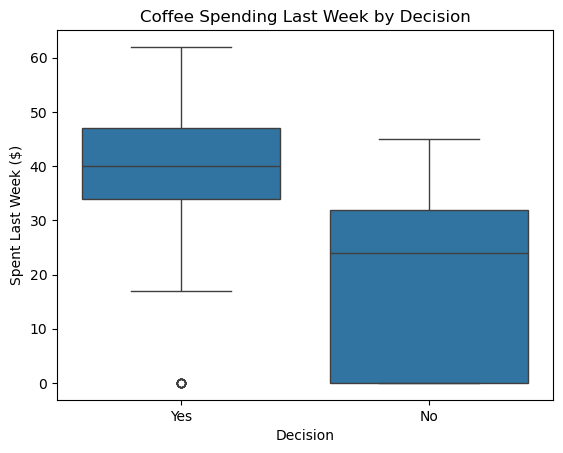

In [40]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week

# Create a boxplot
sns.boxplot(x='Decision', y='spent_last_week', data=NOPrediction)

#Add labels and titles
plt.title('Coffee Spending Last Week by Decision')
plt.xlabel('Decision')
plt.ylabel('Spent Last Week ($)')
plt.show()


Can you admissibly conclude anything from this boxplot? Write your answer here:



People who answered "Yes" (likely to purchase specialty coffee) tend to spend more on coffee in the last week compared to those who answered "No". This is evident because:

- The median spending is higher for the "Yes" group.

- The interquartile range (IQR) and overall distribution for "Yes" is shifted upward.

- The maximum spending and some outliers also appear more in the "Yes" category.

While this visual suggests a trend, it doesn't imply causation — further statistical analysis would be needed to confirm significance.

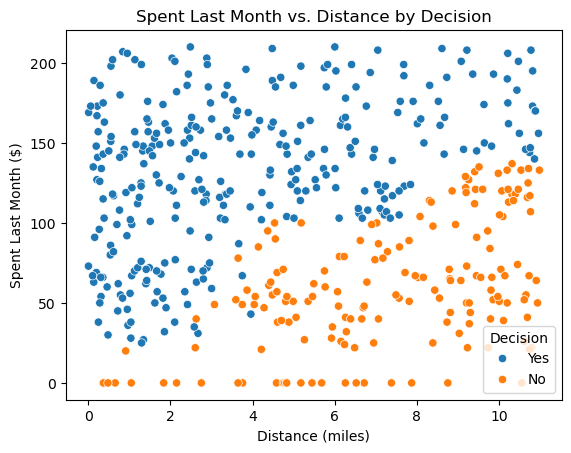

In [42]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 

#Create the scatterplot
sns.scatterplot(data=NOPrediction, x='Distance', y='spent_last_month', hue='Decision')

#Add labels and title
plt.title('Spent Last Month vs. Distance by Decision')
plt.xlabel('Distance (miles)')
plt.ylabel('Spent Last Month ($)')
plt.show()


Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. 

Write your answer here:

Basen on the scatterplot, customers who spent more last month are more likely to say "Yes" to specialty coffee, while those who spent very little (often near $0) tend to say "No", regardless of distance.

- Spent Last Month appears to be a strong predictor of the Decision.

- Distance may have a weaker or secondary influence, especially for customers who spend more (they say "Yes" even if they live farther away).

- There’s a clear vertical separation: almost all high spenders are in the "Yes" category.

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [44]:
# Get just those rows whose value for the Decision column is null  
# Subset where Decision is null
Prediction = coffeeData[coffeeData['Decision'].isnull()]


In [46]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


### 4. Divide the NOPrediction subset into X and y

In [50]:
# Check the names of the columns of NOPrediction
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [60]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"

# Step 1: Create a list of feature column names (excluding 'Decision')
features = ['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
            'spent_last_month', 'salary', 'Distance', 'Online']

# Step 2: Explanatory variables
X = NOPrediction[features]

# Step 3: Target variable
y = NOPrediction['Decision']


### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [64]:
# One-hot encode all features in X.
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.columns


Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Online', 'Gender_Male'],
      dtype='object')

### 6. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [66]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=246
)


# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [72]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 


entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=246)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred_series = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=246)

In [86]:
!conda install python-graphviz -y


Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vidus\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       hc68a040_5         2.3 MB
    certifi-2025.4.26          |  py312haa95532_0         158 KB
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         335 KB
    font-ttf-inconsolata-2.001 |       hcb22688_0          83 KB
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0         654 KB
    font-ttf-ubuntu-0.83       |       h8b1ccd4_0         1.5 MB
    fontconfig-2.14.1          |       hb33846d_3         224 KB
    fonts-anaconda-1           |       h8fa9717_0           3 KB
    fonts-conda-ecosystem-1    |       hd3eb1b0_0           5 KB
    fribidi-1.0.10             |       h6

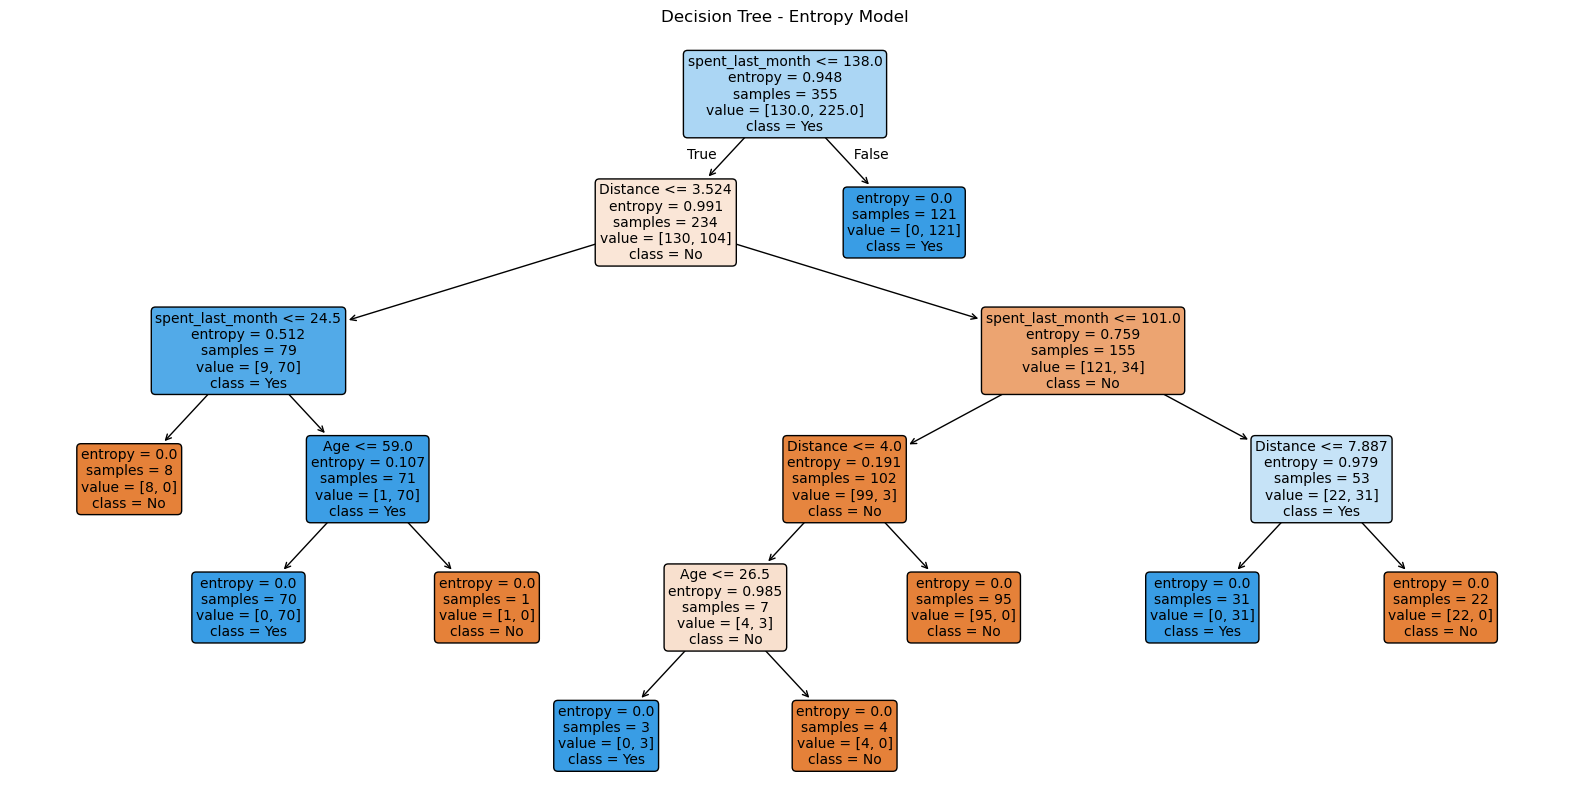

In [88]:
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz


# Now we want to visualize the tree
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(
    entr_model, 
    feature_names=X_train.columns, 
    class_names=entr_model.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree - Entropy Model")
plt.show()

# We can do so with export_graphviz
# Export the tree as DOT data
dot_data = export_graphviz(
    entr_model, 
    out_file=None, 
    feature_names=X_train.columns,
    class_names=entr_model.classes_,
    filled=True, 
    rounded=True,
    special_characters=True
)

# Visualize using graphviz
graph = graphviz.Source(dot_data)
graph  # Displays the tree if you're using a Jupyter Notebook

# Alternatively for class_names use entr_model.classes_
# Use entr_model.classes_ for class_names in export_graphviz
dot_data = export_graphviz(
    entr_model,
    out_file=None,
    feature_names=X_train.columns,
    class_names=entr_model.classes_,  # ← this line uses the model's learned class names
    filled=True,
    rounded=True,
    special_characters=True
)


## Model 1: Entropy model - no max_depth: Interpretation and evaluation

# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

In [94]:
# Run this block for model evaluation metrics 
from sklearn import metrics

print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, y_pred))
print('Precision score for "Yes":', metrics.precision_score(y_test, y_pred, pos_label="Yes"))
print('Precision score for "No":', metrics.precision_score(y_test, y_pred, pos_label="No"))
print('Recall score for "Yes":', metrics.recall_score(y_test, y_pred, pos_label="Yes"))
print('Recall score for "No":', metrics.recall_score(y_test, y_pred, pos_label="No"))


Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes": 0.9873417721518988
Precision score for "No": 1.0
Recall score for "Yes": 1.0
Recall score for "No": 0.975609756097561


What can you infer from these results? Write your conclusions here:

The model performs extremely well, as seen from the evaluation metrics:

- Accuracy: 0.99 → The model correctly predicts ~99% of the test cases.

- Balanced Accuracy: 0.9878 → Strong performance across both classes, even if there's class imbalance.

- Precision for "Yes": ~0.987 → Of all the cases it predicted as "Yes", ~98.7% were correct.

- Precision for "No": 1.0 → Perfect precision: every "No" prediction was correct.

- Recall for "Yes": 1.0 → It caught all actual "Yes" cases (no false negatives).

- Recall for "No": ~0.976 → It missed a small number of actual "No" cases.

This means:
- High precision and recall for both classes mean the model is both accurate and reliable for predictions.

- The model is not overfitting despite no max depth set — likely because of clear decision boundaries (as shown in the tree).

- The decision tree is interpretable with intuitive splits (e.g., spent_last_month <= 138.0 as the root node makes sense based on your EDA).

- There's a slight weakness in recall for "No" (a few "No" cases were incorrectly classified as "Yes").

Conclusion:
This entropy-based model is performing nearly optimally on this dataset. It's a great baseline. 
However, we can - 

- Try pruning (e.g., setting max_depth) to reduce complexity.

- Cross-validate on different data to confirm stability.

- Analyze misclassified cases for insight.

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [105]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'

from sklearn.tree import DecisionTreeClassifier

# Define the Gini impurity model
# Step 1: Define the Gini impurity model
gini_model = DecisionTreeClassifier(criterion='gini', random_state=246)

# Step 2: Fit the model correctly
gini_model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_gini = gini_model.predict(X_test)

# Step 4: Turn predictions into a Series
y_pred_gini_series = pd.Series(y_pred_gini)

# Step 5: Check out the model
gini_model

DecisionTreeClassifier(random_state=246)

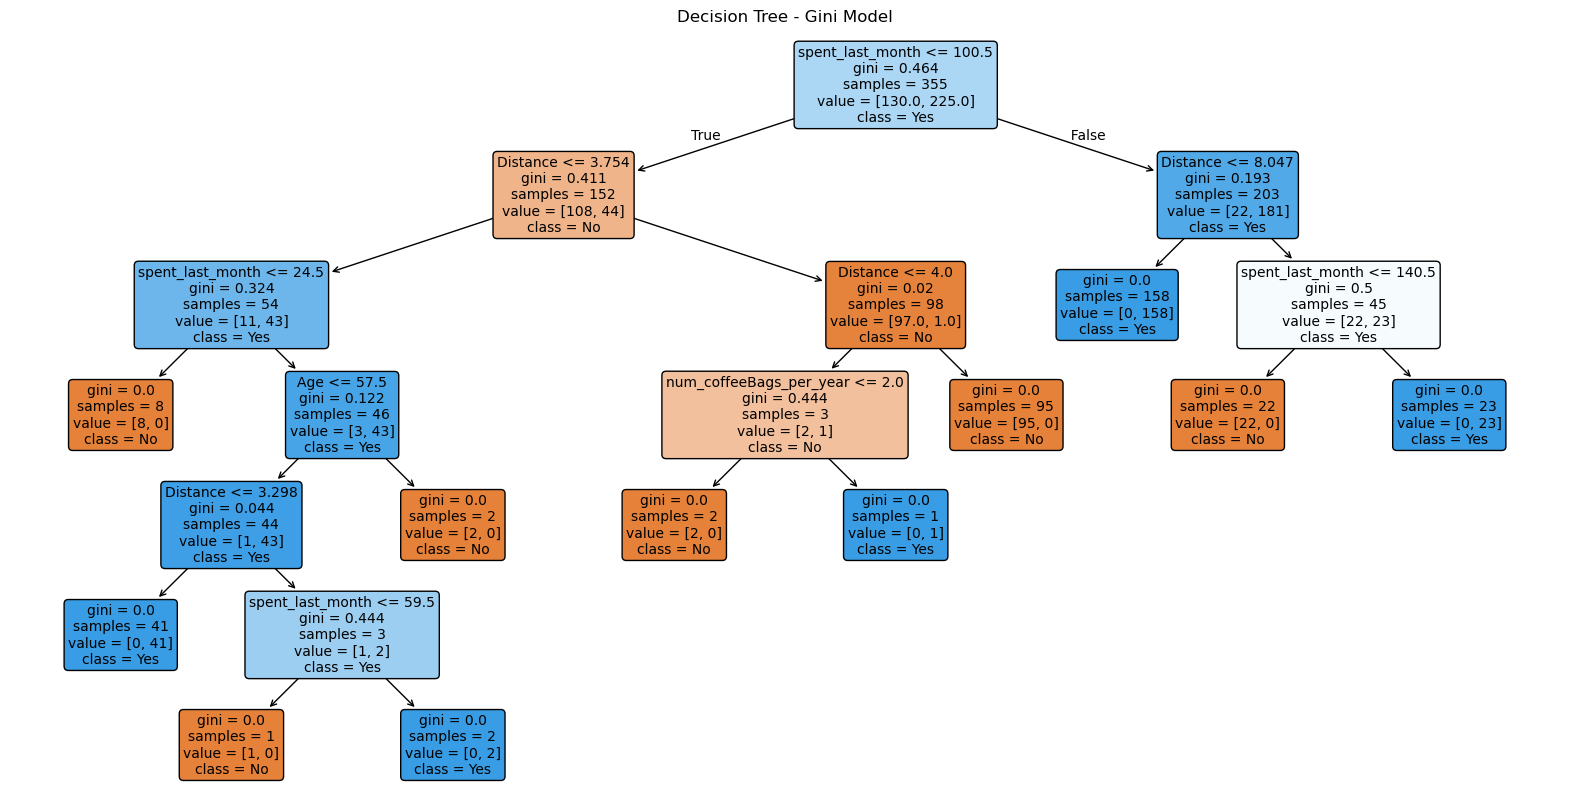

In [109]:
# As before, but make the model name gini_model
plt.figure(figsize=(20, 10))
plot_tree(
    gini_model,
    feature_names=X_train.columns,
    class_names=gini_model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Gini Model")
plt.show()


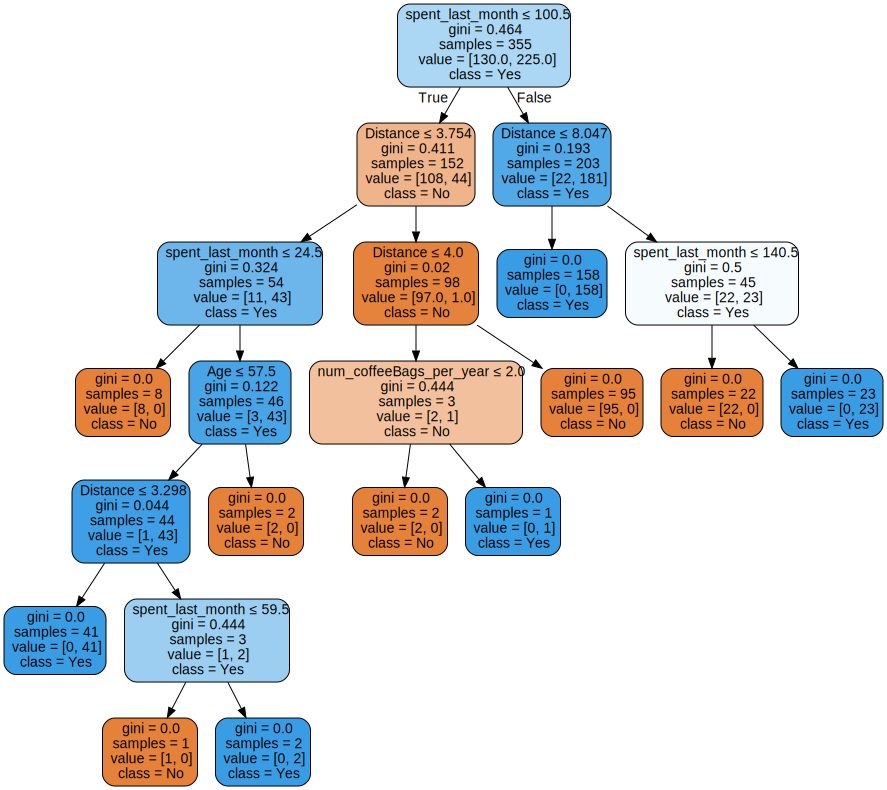

In [111]:

# Alternatively for class_names use gini_model.classes_
dot_data = export_graphviz(
    gini_model,
    out_file=None,
    feature_names=X_train.columns,
    class_names=gini_model.classes_,  # Using gini_model.classes_
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize in notebook
graph = graphviz.Source(dot_data)
graph

In [115]:
# Run this block for model evaluation
#print("Model Gini impurity model")
#print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
#print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
#print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

from sklearn import metrics

print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gini))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, y_pred_gini))
print('Precision score for "Yes":', metrics.precision_score(y_test, y_pred_gini, pos_label="Yes"))
print('Recall score for "No":', metrics.recall_score(y_test, y_pred_gini, pos_label="No"))


Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score for "Yes": 0.9871794871794872
Recall score for "No": 0.975609756097561


How do the results here compare to the previous model? Write your judgements here: 

Both models perform exceptionally well, with only minor differences.

- The entropy model slightly outperforms the Gini model in overall and balanced accuracy.

- Precision and recall scores are almost identical, indicating both models are good at distinguishing between the "Yes" and "No" classes.

- Given how close the performance is, the choice between entropy and Gini may depend more on interpretability, computational cost, or domain preferences.

Conclusion:
We can confidently use either model for prediction - but if you're looking for slightly higher accuracy, stick with the entropy model. 
If speed is more critical (since Gini is computationally cheaper), Gini is also an excellent option.

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [118]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
# Step 1: Create the model with entropy criterion and max_depth=3
entr_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=246)

# Step 2: Fit the model on training data
entr_model2.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_entr2 = entr_model2.predict(X_test)

# Step 4: Convert predictions to a pandas Series
y_pred_entr2_series = pd.Series(y_pred_entr2)

# Step 5 (Optional): Check the model object
entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=246)

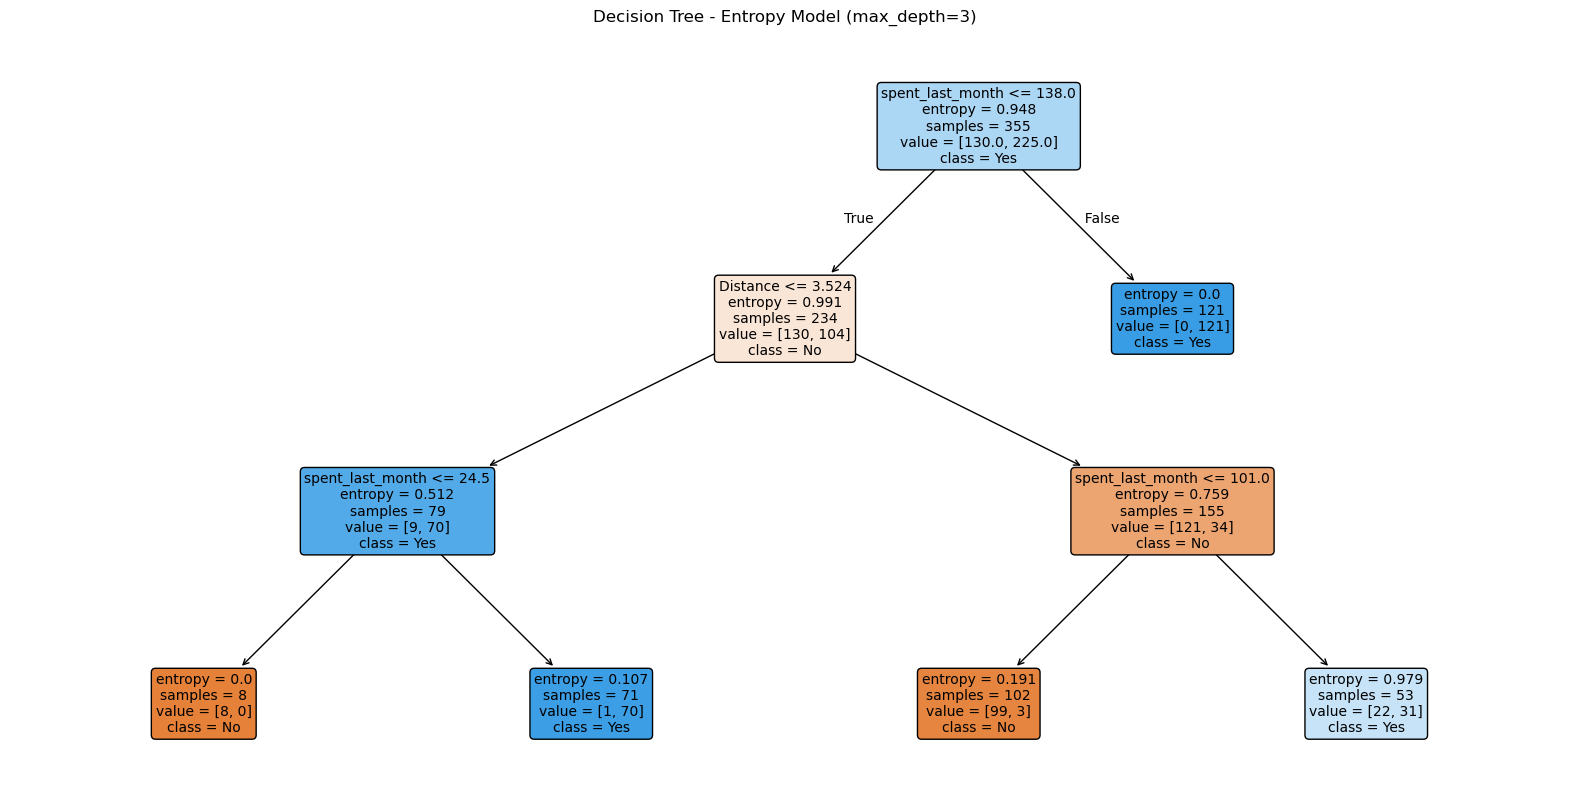

In [120]:
# As before, we need to visualize the tree to grasp its nature
plt.figure(figsize=(20, 10))
plot_tree(
    entr_model2,
    feature_names=X_train.columns,
    class_names=entr_model2.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Entropy Model (max_depth=3)")
plt.show()



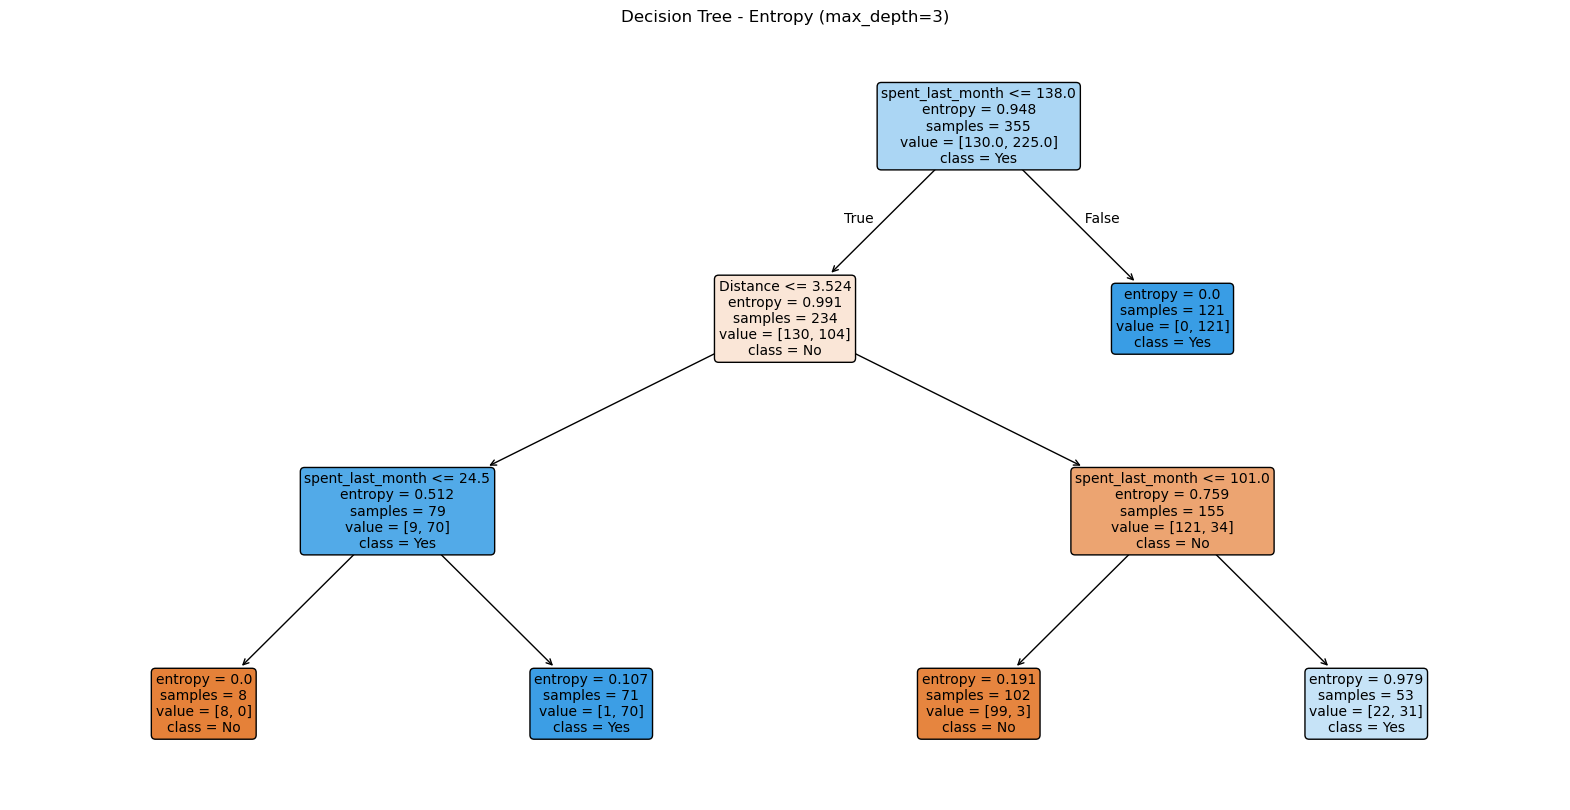

In [122]:
# Alternatively for class_names use entr_model2.classes_
plt.figure(figsize=(20, 10))
plot_tree(
    entr_model2,
    feature_names=X_train.columns,
    class_names=entr_model2.classes_,  # ← This is where you use entr_model2.classes_
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Entropy (max_depth=3)")
plt.show()

In [126]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_entr2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, y_pred_entr2))
print('Precision score for "Yes":', metrics.precision_score(y_test, y_pred_entr2, pos_label="Yes"))
print('Recall score for "No":', metrics.recall_score(y_test, y_pred_entr2, pos_label="No"))

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score for "Yes": 0.8764044943820225
Recall score for "No": 0.7317073170731707


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

While Model 3 performs worse on test accuracy and other metrics, it may not be strictly inferior:

Advantages of Model 3:
- Simpler and shallower tree → Easier to interpret and explain to stakeholders.

- Lower risk of overfitting, especially on small or noisy datasets.

- Faster to train and predict, good for real-time systems.

Trade-offs:
Lower recall for "No" suggests the model is more likely to miss people who would not buy coffee — important if goal is to avoid false positives.

Lower overall accuracy and balance may affect business performance if misclassifications are costly.

Summary:
Model 3 offers simplicity and interpretability, but at a cost to predictive performance. 
If interpretability is a priority or looking to deploy a lightweight model, it's still valuable. 
However, if maximizing accuracy is the goal, Model 1 is superior.

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [131]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_gini2 = gini_model2.predict(X_test)

# Step 4: Convert predictions to a pandas Series
y_pred_gini2_series = pd.Series(y_pred_gini2)

# Step 5: Check the model (optional)
gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [135]:
dot_data = StringIO()
# Create DOT data as a string
dot_data = StringIO()
export_graphviz(
    gini_model2,
    out_file=dot_data,
    feature_names=X_train.columns,
    class_names=gini_model2.classes_,  # Use the model's class names directly
    filled=True,
    rounded=True,
    special_characters=True
)



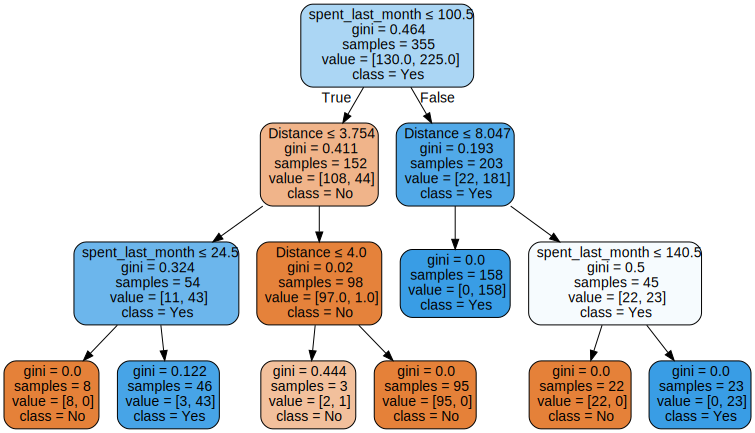

In [137]:

# Alternatively for class_names use gini_model2.classes_
# Render the DOT data as a graph
graph = graphviz.Source(dot_data.getvalue())
graph  # Displays the tree if using Jupyter Notebook

In [141]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "No"))

Gini impurity  model - max depth 3
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score 0.9873417721518988
Recall score 0.975609756097561


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

Even though its accuracy is slightly below the full-depth models, it offers the best balance between performance, simplicity, and generalization:

Reasons it's the best model overall:
1. High performance, low complexity
Accuracy (99.2%) and balanced accuracy (98.8%) are nearly as high as the full-depth models.

Yet, it achieves this using only 3 levels of depth, which makes it much more interpretable and efficient.

2. Avoids overfitting
Shallower trees reduce the risk of memorizing the training data.

Likely to generalize better to new, unseen data, which is the true test of a model’s value.

3. Clear and explainable rules
Decision paths like spent_last_month ≤ 100.5 and distance ≤ 8.047 are easy to understand and communicate to non-technical stakeholders.

4. Maintains class balance
Despite being pruned, it preserves strong recall for the "No" class (97.6%), meaning it rarely misses customers who aren't likely to buy.

Model 4 (Gini, max depth 3) delivers nearly perfect performance with a minimal, elegant structure — making it the most practical and robust model in your set.

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [147]:
# Call value_counts() on the 'Decision' column of the original coffeeData
coffeeData['Decision'].value_counts()

Decision
Yes    303
No     171
Name: count, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [149]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = [col for col in coffeeData.columns if col != 'Decision']

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]
Prediction = coffeeData[coffeeData['Decision'].isnull()]
new_X_encoded = pd.get_dummies(new_X, drop_first=True)
potential_buyers = gini_model2.predict(new_X_encoded)

In [151]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X_encoded = pd.get_dummies(new_X, drop_first=True)


# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
pd.Series(potential_buyers).value_counts()


Yes    183
No      45
Name: count, dtype: int64

In [153]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_buyers, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([ 45, 183], dtype=int64))

The total number of potential buyers is 303 + 183 = 486

In [155]:
# Print the total number of surveyed people 
print("Total surveyed people:", coffeeData.shape[0])


Total surveyed people: 702


In [157]:
# Let's calculate the proportion of buyers
# Count the "Yes" predictions
yes_count = np.count_nonzero(potential_buyers == "Yes")

# Calculate proportion
proportion_of_buyers = yes_count / len(potential_buyers)

# Print result
print("Proportion of potential buyers:", proportion_of_buyers)

Proportion of potential buyers: 0.8026315789473685


In [159]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
# Count "Yes" predictions
yes_count = np.count_nonzero(potential_buyers == "Yes")

# Calculate percentage
percentage_yes = (yes_count / len(potential_buyers)) * 100

# Print the result
print(f"Percentage of potential buyers: {percentage_yes:.2f}%")

Percentage of potential buyers: 80.26%


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [163]:
# Plug in appropriate max_depth and random_state parameters 
# Create the Random Forest model
firstRFModel = RandomForestClassifier(max_depth=3, random_state=1234)

# Fit the model on training data
firstRFModel.fit(X_train, y_train)

# Make predictions on the test data
y_pred = firstRFModel.predict(X_test)


In [169]:

# Model and fit
firstRFModel = RandomForestClassifier(max_depth=3, random_state=1234)
firstRFModel.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=1234)

In [175]:
#For prediction
y_pred = firstRFModel.predict(X_test)
y_pred

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes'], dtype=object)

### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 

Your Random Forest model results:

- Yes: 183 predicted buyers

- No: 45 predicted non-buyers

- Total: 228 predictions

Percentage of buyers:
(183/228)×100≈80.26
(183/228)×100≈80.26

Here threshold to strike the deal was 70% predicted buyers.

The Random Forest model predicts ~80% would buy, which is even more confident than best decision tree (Model 4, which also had high accuracy and interpretability).

Compared to Model 4 (Gini Tree, max depth = 3):
Model 4 gave you a strong, interpretable result just at the decision boundary.

Random Forest confirms and strengthens that result, with a slightly more robust and confident prediction due to ensemble averaging.

Finally,
Yes — strike the deal with the Hidden Farm farmers.
The evidence across multiple models, especially from the Random Forest, suggests strong customer interest. 
The risks are low, and the opportunity high.